# Lab 12 - Regression


This lab session focuses on a regression analysis and its applications. We will excercise some of the python tools for building and evaluating the regression models. 

Specifically we will look into:
* Simple Linear Regression 
* Multiple Linear Regression
* Polynomial Regression 
* Logistic Regression

Before, getting into lab excercise, we will look into the basics and run codes for regression models from textbook

For future reference: 

* http://scikit-learn.org/stable/modules/linear_model.html

The main concepts while building the regession models are:
- Exploring and visualizing the dataset (EDA)
- Selection of regression models 
- Training regression model 
- Evaluating the model built 
- Fitting these models to dataset under study

## Autograder Setup

Code establishing a condition so that you don't have to worry about commenting out lines of code before submitting.

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
if IN_COLAB == True: 
    print("Installing otter:")
    !pip install otter-grader==4.2.0
    !wget https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab12/lab12.files.zip
    !unzip lab12.files.zip

Installing otter:
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204 kB 4.7 MB/s 
     |████████████████████████████████| 297 kB 8.3 MB/s 
     |████████████████████████████████| 100 kB 2.4 MB/s 
     |████████████████████████████████| 1.6 MB 9.4 MB/s 
     |████████████████████████████████| 46 kB 1.6 MB/s 
     |████████████████████████████████| 84 kB 1.3 MB/s 
--2022-11-30 19:21:55--  https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab12/lab12.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5249 (5.1K) [application/zip]
Saving to: ‘lab12.files.zip’

lab12.files.zip     100%[===================>]   5.13K  --.-KB/s    in 0s      

2022-11-30 19:21:55 (77.8 MB/s) - ‘lab12.files.zip’ saved [5249/5249]

Archive:  lab12.files.zip
  inflating: SeaIce.

## Lab Setup 

Import packages, setup otter. 

In [3]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")

import otter
grader = otter.Notebook()

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures


## Simple Linear Regression

The simplest relation that can exist in the model is the **linear model**, where the response $\textbf{y}$ (response or target variable) depends linearly from the covariates $\textbf{x}_i$ (feature).

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter 

$a_0$ is called the constant term or the *intercept*.

$a_1$ is called the coefficient of the explanatory variable *coeff*.

### Example 1 

Create a random data set.

In [4]:
# Random points sampled from a univariate “normal” (Gaussian) distribution
X1 = np.random.randn(300, 2)  
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A) # np.dot() returns the dot product of two array

Exploring and visualizing the dataset (EDA)

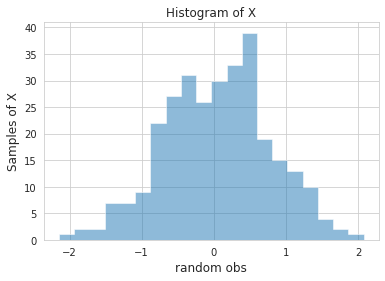

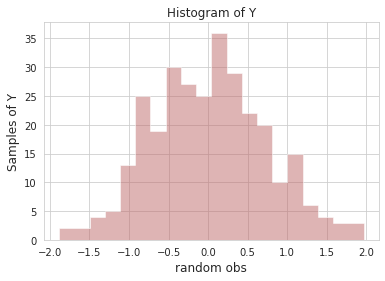

In [5]:
pd.DataFrame(X2[:,0]).hist(histtype='stepfilled', alpha=.5, bins=20)
plt.xlabel('random obs',fontsize=12)
plt.ylabel('Samples of X',fontsize=12)
plt.title('Histogram of X')
pd.DataFrame(X2[:,1]).hist(histtype='stepfilled', alpha=.5, 
                           color=sns.desaturate("indianred", .75), bins=20)
plt.xlabel('random obs',fontsize=12)
plt.ylabel('Samples of Y',fontsize=12)
plt.title('Histogram of Y')
plt.show()

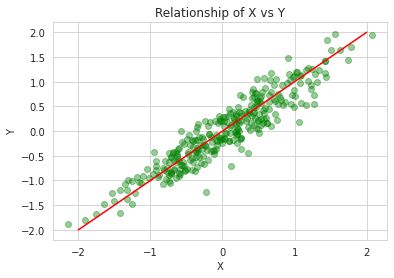

In [6]:
# We can visualize the relationship between X and Y 
#   as well as a model between them.  
model = [0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.4, c='g');
plt.plot(np.arange(-2,3), model, 'r');
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship of X vs Y')
plt.show()
# The red line gives the predicted values of this model

* There could be multiple regression models (in this case, multiple fitting lines), similar to the classifiers, we need to gauage and evaluate. 
* The best fitting line is known as regression line 
* Another important terminalogy is the **residual** or **offsets** which is nothing but an errors of the prediction with the real parameters.

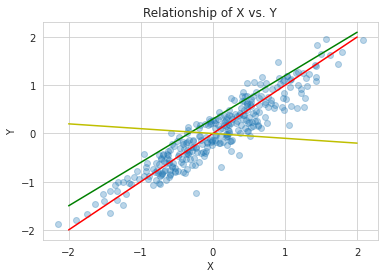

In [7]:
# Visualize multiple models (fitting lines)

plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
# We can use several parameters and we do not know which is the best model
model1 = [0.0 + 1.0*x for x in np.arange(-2,3)]
model2 = [0.3 + 0.9*x for x in np.arange(-2,3)]
model3 = [0.0 - 0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1, 'r')
plt.plot(np.arange(-2,3), model2, 'g')
plt.plot(np.arange(-2,3), model3, 'y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship of X vs. Y');

## Ordinary Least Squares 

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s 
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$, 
are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

## Example 2 - SeaIce 

* Loading Sea Ice Data and climate change dataset
* Dataset: **SeaIce.txt **
* Preprocessing and Data Cleaning is necessary
* Processed data is to be stored as a pickle (*.pkl)

In [8]:
# Load data 
ice = pd.read_csv('SeaIce.txt', delim_whitespace = True)
print ('shape:', ice.shape)
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


As part of understanding the data let's look at some statistics for the variables. 

In [9]:
ice.describe()
# Observation: a negative mean?

,year,mo,extent,area
count,424.000000,424.000000,424.000000,424.000000
mean,1996.000000,6.500000,-35.443066,-37.921108
std,10.214716,3.474323,686.736905,686.566381
min,1978.000000,1.000000,-9999.000000,-9999.000000
25%,1987.000000,3.000000,9.272500,6.347500
50%,1996.000000,6.500000,12.385000,9.895000
75%,2005.000000,10.000000,14.540000,12.222500
max,2014.000000,12.000000,16.450000,13.840000


We see negative means in the `extent` and `area` variables. This seems wrong, what is happening.   Let's do some Exploratory Data Analysis. 

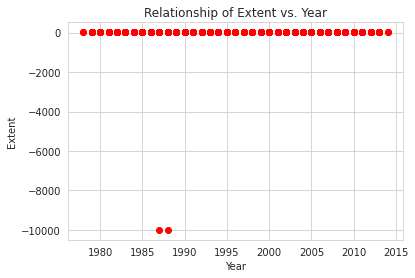

In [10]:
# Visualize the data
x = ice.year
y = ice.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Relationship of Extent vs. Year');

Observation from above: 
    
- We see that there is an anamoly in the dataset
- "-9999" does not seems to be a data, this value has potential to impact the regression line
- One has to be very careful in analyzing this type of outliers.  
This is where, EDA (Exploratory Data Analysis) comes into picture
- Data Cleaning and Pre-processing is very much essential in this case.

In [11]:
# Data Cleaning 
print('Different values in data_type field:\n', 
      np.unique(ice.data_type.values) , '\n')  
# there is a -9999 value!)

# Let's see what type of data we have more than Goddard and NRTSI-G 
print(ice[(ice.data_type != 'Goddard')
          & (ice.data_type != 'NRTSI-G')])

Different values in data_type field:
 ['-9999' 'Goddard' 'NRTSI-G'] 

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


shape: (422, 6)


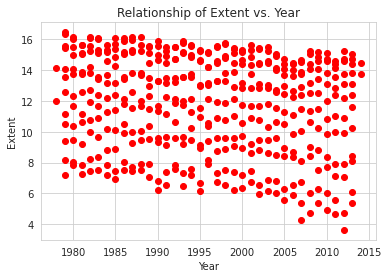

In [12]:
# We can easily clean the data now:
# In this case, our data cleaning step is to remove 
#  the outlier values
ice2 = ice[ice.data_type != '-9999']
print ('shape:', ice2.shape)

# And repeat the plot
x = ice2.year
y = ice2.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Relationship of Extent vs. Year');

In [13]:
# Let's set up the clean data called "SeaIce"
SeaIce = ice2

## Linear Regression

Let's look at our data extent by month. 

https://seaborn.pydata.org/generated/seaborn.lmplot.html

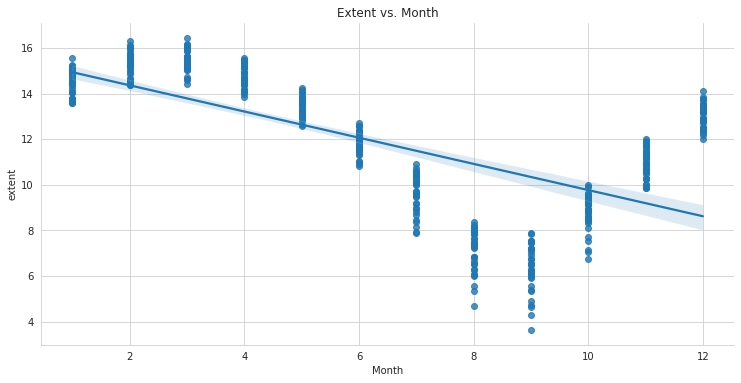

In [14]:
sns.lmplot(x = "mo", y = "extent", data = SeaIce, height = 5.2, aspect = 2)
plt.xlabel("Month")
plt.title('Extent vs. Month');

Unsuprisingly, the sea ice extent varies by time of year (month).

In [15]:
# Compute the mean for each month.
grouped = SeaIce.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print ('Means:', month_means)
print ('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


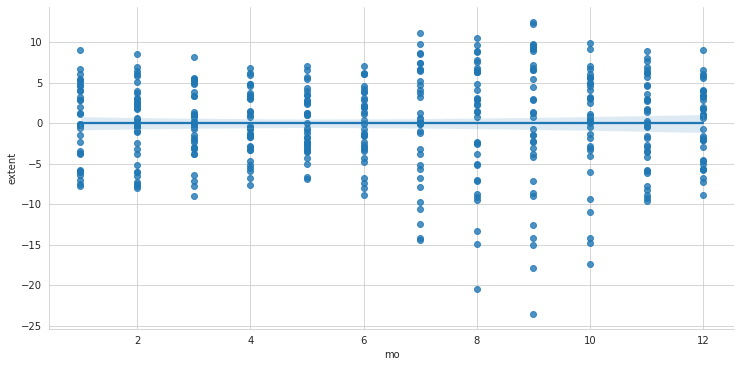

In [16]:
# Let's normalize across months

for i in range(12):
    SeaIce['extent'].mask((SeaIce['mo']==i+1), 
                          100*(SeaIce['extent'] - month_means[i+1])/month_means.mean(), 
                          inplace=True)
    
sns.lmplot(x = "mo", y = "extent", data = SeaIce, height = 5.2, aspect = 2);

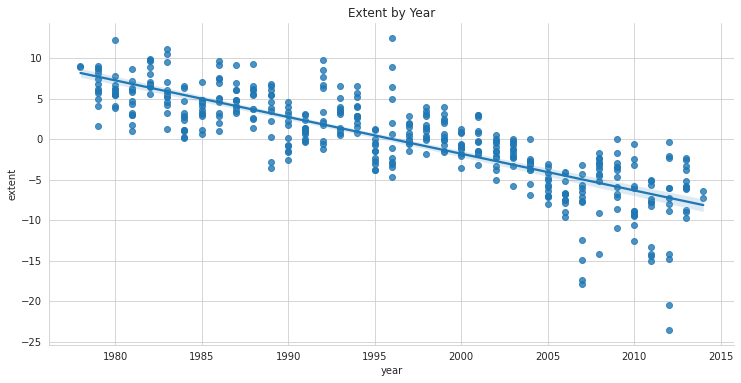

In [17]:
# Plot extent by year 

sns.lmplot(x = "year", y = "extent", data = SeaIce, height = 5.2, aspect = 2);
plt.title('Extent by Year');

Note, we could look at the trends for each month in a separate small multiples plot. 

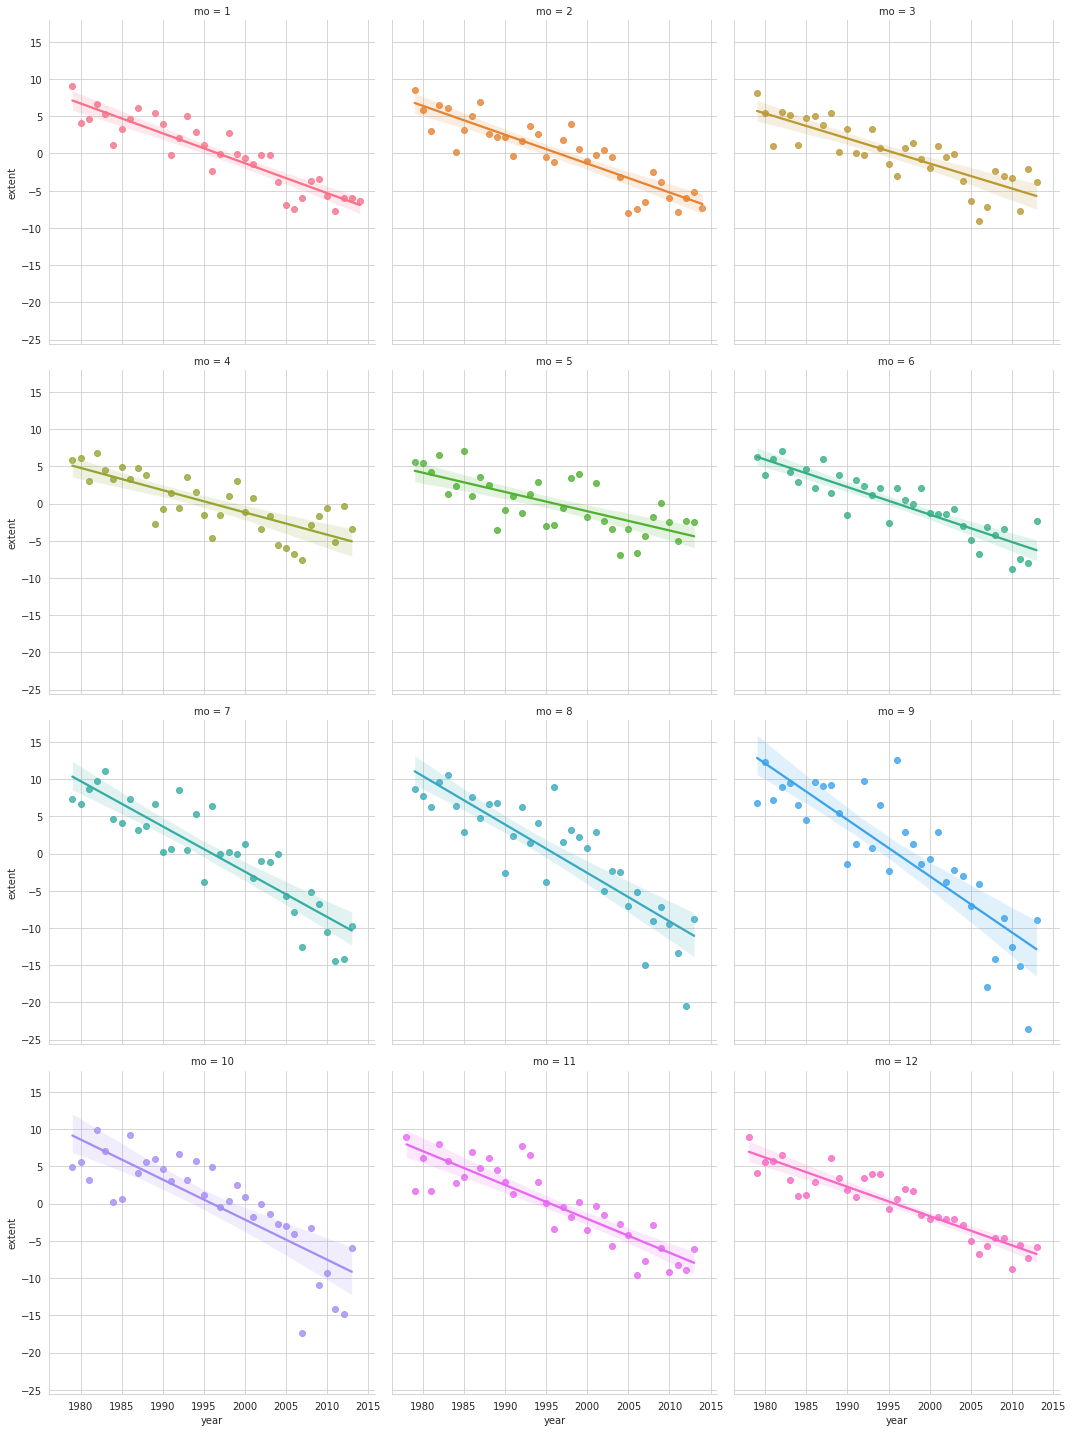

In [18]:
sns.lmplot(x="year", y="extent", hue="mo", col="mo", 
           data=SeaIce, col_wrap=3) 

We can also compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

For that we use using **Scikit-learn**, library that provides a variety of both supervised and unsupervised machine learning techniques.

## Linear Regression with `sklearn`

In [19]:
# from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = SeaIce[['year']]
y = SeaIce[['extent']]

est.fit(x, y)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


We can evaluate the model by computing: 

* Mean squared error - MSE 
* Coefficient of dtermination $R^2$ 

The coefficient $R^2$ is defined as 

$(1 - \textbf{u}/\textbf{v})$,

where $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$ and $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.

The best possible score for $R^2$ is 1.0: lower values are worse.

These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

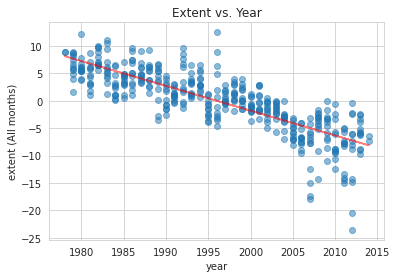

In [20]:
# from sklearn import metrics

# Analysis for all months together.
x_q1 = SeaIce[['year']]
y_q1 = SeaIce[['extent']]
model = LinearRegression()
model.fit(x_q1, y_q1)
yhat_q1 = model.predict(x)
plt.plot(x, y_q1,'o', alpha = 0.5)
plt.plot(x, yhat_q1, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
plt.title('Extent vs. Year');

<!-- BEGIN QUESTION -->

### Q1. Residuals plot 

Plot the residuals from the example above.  That is, plot the predicted value vs. the residual. 

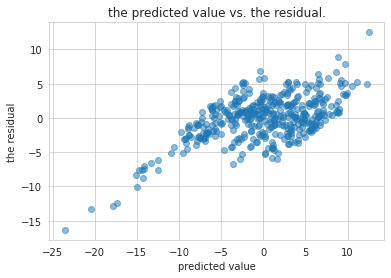

In [21]:
residual = y_q1 - yhat_q1

plt.plot(y_q1,residual, 'o', alpha = 0.5)
# plt.plot(x, yhat_q1, 'r', alpha = 0.5)
plt.xlabel('predicted value')
plt.ylabel('the residual')
plt.title('the predicted value vs. the residual.');


<!-- END QUESTION -->

### Q2. Calculate model performance 

Evaluate the performance of linear regression using MSE and R2 as a measure.

In [22]:
mse = metrics.mean_squared_error(y_q1, yhat_q1)
r2 = metrics.r2_score(y_q1, yhat_q1)

print("MSE:", mse)
print("R^2:", r2)

MSE: 10.539131639803488
R^2: 0.669696838688876


In [23]:
grader.check("q2")

q2 results: All test cases passed!

## Multiple Linear & Polynomial Regression 

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

## Ames Housing Data 

Let's load some new data to examine. 

In [24]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
print(housing.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [25]:
Xhouse,yhouse = housing.data, housing.target
print('Shape of data:', Xhouse.shape, yhouse.shape)

Shape of data: (1460, 80) (1460,)


In [26]:
df = pd.DataFrame(Xhouse, columns = housing.feature_names)
df.drop(labels='Id', axis=1, inplace=True)
df['Value'] = housing.target
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Value
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


Here let' look at a plot of the House `Value` vs. the `LotFrontage` using `lmplot`

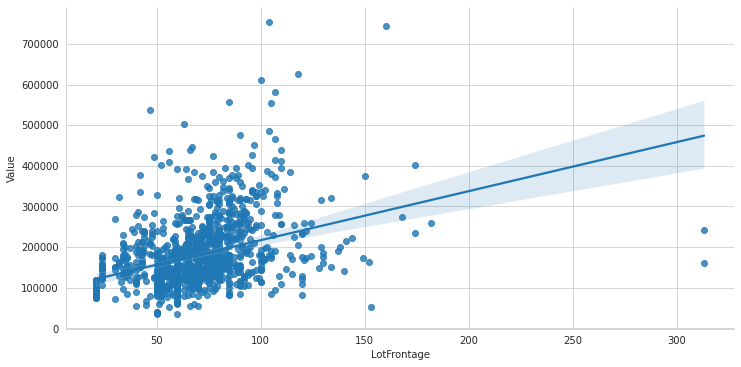

In [27]:
# Visualization of the relations between LotFrontage and Value
sns.lmplot(x = "LotFrontage", y = "Value", data = df, height = 5.2,aspect=2);

Or, we can look at another variable, let's say `GrLivArea`: Above grade (ground) living area square feet.

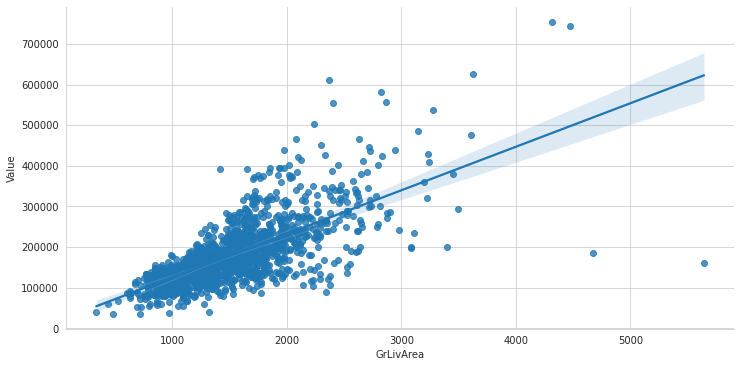

In [28]:
# Visualization of the relations between GrLivArea and Value
sns.lmplot(x = "GrLivArea", y = "Value", data = df, height = 5.2,aspect=2);

Or, we can examine the year build vs. value. 

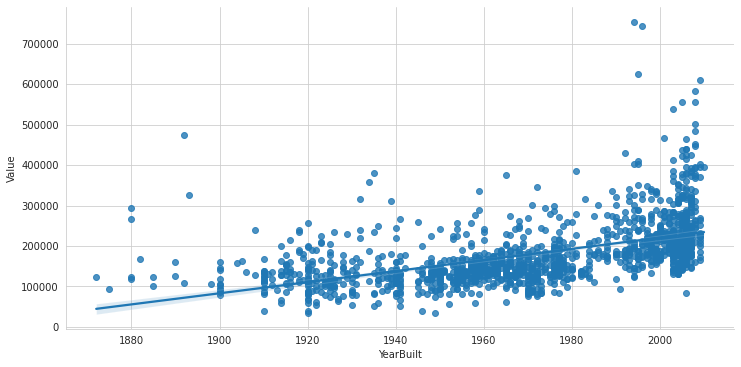

In [29]:
# Visualization of the relations between GrLivArea and Value
sns.lmplot(x = "YearBuilt", y = "Value", data=df, height = 5.2,aspect=2);

Here let's look at the performance of a model to predict house value using just the `YearBuilt`

In [30]:
x = df[['YearBuilt']]
y = df[['Value']]

model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

print("MSE:", metrics.mean_squared_error(y, y_hat))
print("R^2:", metrics.r2_score(y, y_hat))

MSE: 4582376228.725916
R^2: 0.27342162073249154


**We see that the regression line is poorly fit and which causes large MSE and low R2 score **

**We can now look into multiple linear regression and polynomial linear regression **

<!-- BEGIN QUESTION -->

### Q3. Apply higher order regression 

Apply different order to the linear regression and observe the plot.
* Let interested variable be YearBuilt and Value.
* Multiple linear regression can be realised using the order in `lmplot` 
* Try changing the order to 2, 3, 4, and 5

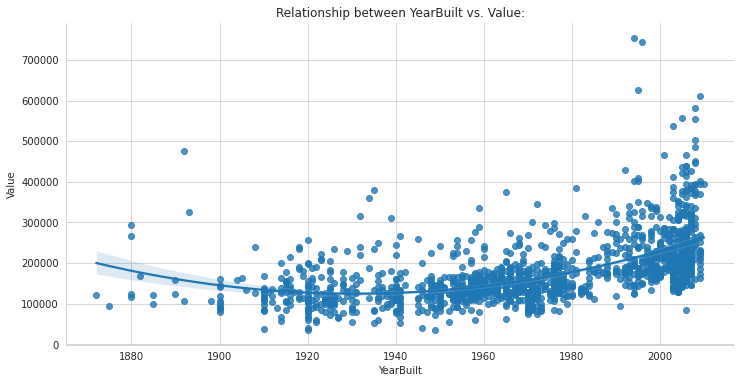

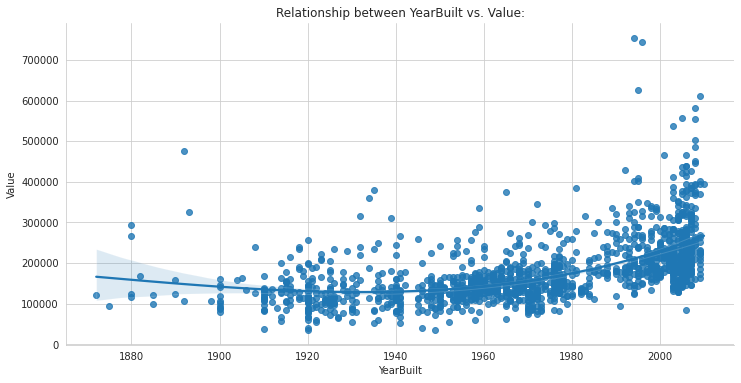

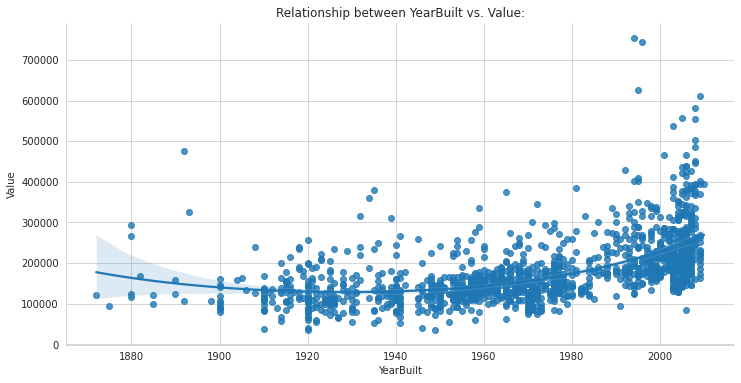

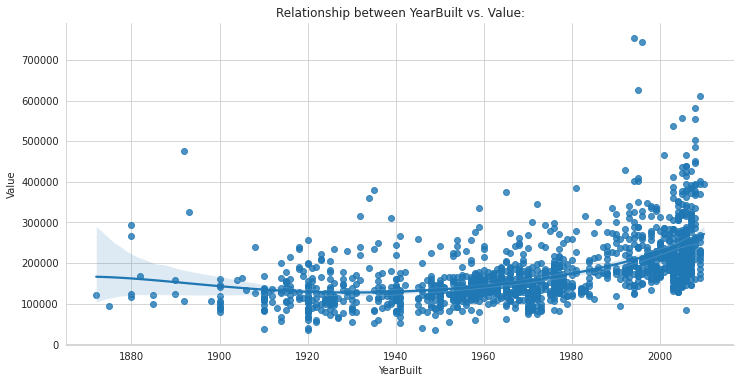

In [31]:
for i in range(2,6):
    sns.lmplot(x = "YearBuilt", y = "Value", data = df, height = 5.2, aspect = 2, order = i);
    plt.title("Relationship between YearBuilt vs. Value:");

<!-- END QUESTION -->

### Analyze relationships of variables to target 

Applying linear regression and finding the relationship for each variable is a time-consuming. There are various functions that help to analyze the complete dataset and its relation. A few of them are
* Correlation (corr) - Used to compute the Correlation between variable. Available in pandas 'corr'. Various correlation methods can be applied - pearson, spearman and kendall. - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
* Heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
* Scatterplot matrix - https://seaborn.pydata.org/examples/scatterplot_matrix.html

Let's look at the relationship among a few of the continuous (categorical presented as numbers) variables. 

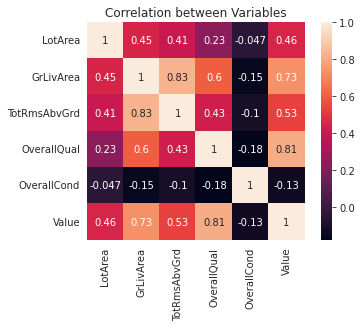

In [ ]:
# Heatmap 
df2 = df[['LotArea', 'GrLivArea', 'TotRmsAbvGrd', 'OverallQual', 'OverallCond', 'Value']]
corrmat = df2.corr(method='spearman')

# Draw the heatmap using seaborn
sns.heatmap(corrmat, square = True, annot=True)
plt.title('Correlation between Variables');

As we can see the `TotRmsAbvGrd` and `GrLivArea` has the largest correlation of 0.83.  This is not terribly surpising. 

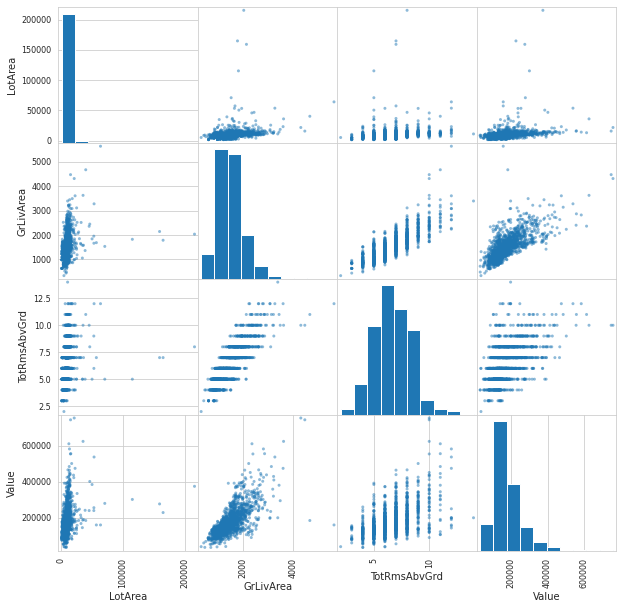

In [ ]:
df2 = df[['LotArea', 'GrLivArea', 'TotRmsAbvGrd', 'Value']]
colIdx = [df.columns.get_loc(c) for c in ['LotArea', 'GrLivArea', 'TotRmsAbvGrd', 'Value'] if c in df]
pd.plotting.scatter_matrix(df2, figsize = (10.0, 10.0)); 

Using Seaborn, we can also fit linear regression models to the scatter matrix plots

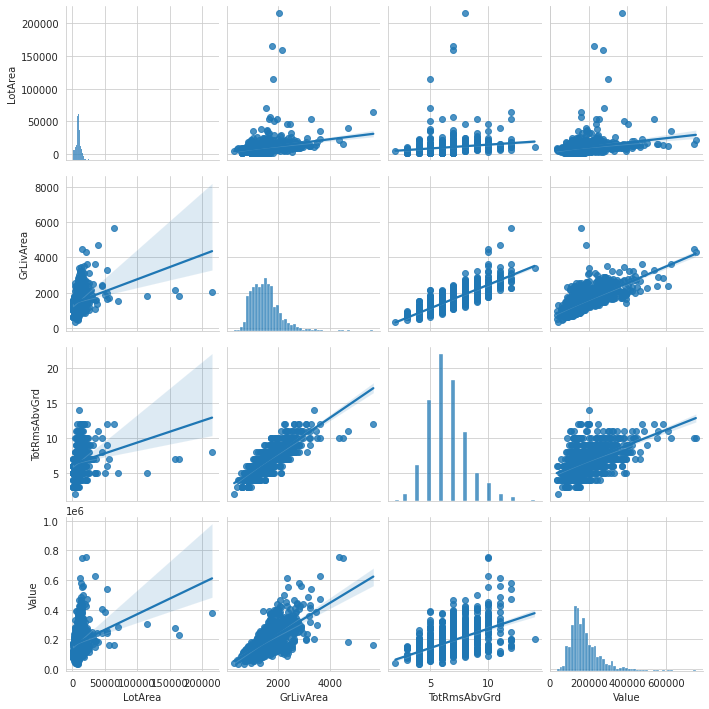

In [ ]:
sns.pairplot(df2, kind="reg", aspect=1.0);

### Q4.  Linear Regression on Housing data 

- Set up your data for analysis: 
    X has three variables: 'LotArea', 'GrLivArea', 'TotRmsAbvGrd'
    the target is yhouse
- Split the data into training and testing (80:20), random_state = 5
- Apply Linear Regression
- Find the coefficient and intercepts of the predicted model
- Compute testing and training MSE and R^2 


Refs:    
* For MSE, refer to http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* Applying Linear Regression and finding coefficient, look into : 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [32]:
X = Xhouse[['LotArea', 'GrLivArea', 'TotRmsAbvGrd']].copy()
y = yhouse

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, test_size=0.20,random_state=5)
print('Training and testing set sizes', X_train.shape, X_test.shape)

# fitting linear regression
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

print('Coeff:', regr.coef_)
print('Intercept:', regr.intercept_)

# predict values for training/testing data 
yhatTr = regr.predict(X_train)   
yhatTe = regr.predict(X_test)

mseTr =  metrics.mean_squared_error(y_train, yhatTr)
mseTe = metrics.mean_squared_error(y_test, yhatTe)
r2Tr = metrics.r2_score(y_train, yhatTr)
r2Te = metrics.r2_score(y_test, yhatTe)

print('Training R^2:', r2Tr)
print('Testing R^2:', r2Te)
print('Training MSE: ', mseTr)
print('Testing MSE: ', mseTe)

Training and testing set sizes (1168, 3) (292, 3)
Coeff: [ 6.25425058e-01  1.16635870e+02 -6.88894509e+03]
Intercept: 41462.27497458385
Training R^2: 0.49007608735184804
Testing R^2: 0.6100840438297033
Training MSE:  3192151683.049798
Testing MSE:  2530557128.4218507


In [33]:
grader.check("q4")

q4 results: All test cases passed!

### Q5.  Data Scaling 

Let's repeat Q4 from above, but this time add a step to perform some data pre-processing. 

We saw above that the Lot Area had a skewed distribution. 

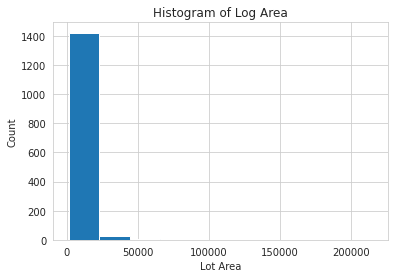

In [34]:
X.LotArea.hist()
plt.ylabel('Count')
plt.xlabel('Lot Area')
plt.title('Histogram of Log Area');

You can verify for yourself that the other two variables are closer to a Gaussian distribution. 

Therefore, let's complete the following preprocessing: 

 - Set up your dataframe for analysis: X has three variables: 'LotArea', 'GrLivArea', 'TotRmsAbvGrd' the target is yhouse
 - Add a column 'LogLotArea' to the dataframe and delete 'LotArea'
 - Split the data into training and testing (80:20), random_state = 5:  X_train, X_test, y_train, y_test
 - Run RobustScaler (similar to StandardScaler, but robust to outliers) on the train and test data:  X_train_sc, X_test_sc
 - Apply Linear Regression
 - Find the coefficient and intercepts of the predicted model
 - Compute testing and training MSE and R^2

In [48]:
X = Xhouse[['LotArea', 'GrLivArea', 'TotRmsAbvGrd']].copy()
y = yhouse

# Add LogLotArea column, drop LotArea column to X 
X['LogLotArea'] = np.log(X['LotArea'])
X = X.drop('LotArea', axis=1)

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, test_size=0.20,random_state=5)
print('Training and testing set sizes', X_train.shape, X_test.shape)

# define the scaler, use RobustScaler 
scaler = RobustScaler().fit(X_train)

# fit on the training dataset   apply the transformation to both train and test data
# scaler.fit_transform(X, y)
# scale the training dataset
X_train_sc = scaler.transform(X_train)
# scale the test dataset
X_test_sc = scaler.transform(X_test)


# fitting linear regression
regr_q5 = LinearRegression(fit_intercept=True).fit(X_train_sc,y_train)

print('Coeff:', regr.coef_)
print('Intercept:', regr.intercept_)

# predict values for training/testing data 
yhatTr_sc = regr_q5.predict(X_train_sc)   
yhatTe_sc = regr_q5.predict(X_test_sc)

mseTr_sc =  metrics.mean_squared_error(y_train, yhatTr_sc)
mseTe_sc = metrics.mean_squared_error(y_test, yhatTe_sc)
r2Tr_sc = metrics.r2_score(y_train, yhatTr_sc)
r2Te_sc = metrics.r2_score(y_test, yhatTe_sc)


print('Training R^2:', r2Tr_sc)
print('Testing R^2:', r2Te_sc)
print('Training MSE: ', mseTr_sc)
print('Testing MSE: ', mseTe_sc)


Training and testing set sizes (1168, 3) (292, 3)
Coeff: [ 6.25425058e-01  1.16635870e+02 -6.88894509e+03]
Intercept: 41462.27497458385
Training R^2: 0.5022640655939075
Testing R^2: 0.6110391889410581
Training MSE:  3115854270.2528234
Testing MSE:  2524358230.3465934


In [49]:
grader.check("q5")

q5 results: All test cases passed!

### Q6. Polynomial Regression 

Let's now do the same analysis with Polynomial regression.  Use the same split of the data as above used in Q5: `X_train_sc`, `X_test_sc`.  Explore using a quadratic and cubic model.  Report out the MSE, R^2 on the training and testing data.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#



In [53]:

# from sklearn.preprocessing import PolynomialFeatures

# create quadratic features 
quadratic = PolynomialFeatures(2)
# create training/testing data on quadratic features 
Xtrain_sc_quad = quadratic.fit_transform(X_train_sc)
Xtest_sc_quad = quadratic.fit_transform(X_test_sc)

# Create and fit Linear Regression model 
regr_q6 =  LinearRegression(fit_intercept=True).fit(Xtrain_sc_quad,y_train)

# Make predictions with model 
yhat_quad_tr = regr_q6.predict(Xtrain_sc_quad)   
yhat_quad_te = regr_q6.predict(Xtest_sc_quad)

# Quantify model performance 
r2_quad_tr = metrics.r2_score(y_train, yhat_quad_tr)
r2_quad_te = metrics.r2_score(y_test, yhat_quad_te)
mse_quad_tr = metrics.mean_squared_error(y_train, yhat_quad_tr)
mse_quad_te = metrics.mean_squared_error(y_test, yhat_quad_te)



print('Training R2 score:', r2_quad_tr)
print('Testing  R2 score:', r2_quad_te)
print('Training MSE:', mse_quad_tr)
print('Testing  MSE:', mse_quad_te)

Training R2 score: 0.5402515088830846
Testing  R2 score: 0.5592895383494895
Training MSE: 2878050790.120727
Testing  MSE: 2860213804.158092


In [55]:

# from sklearn.preprocessing import PolynomialFeatures

# create cubic polynomial features 
cubic = PolynomialFeatures(3)
# create training/testing data on quadratic features 
Xtrain_sc_cubic = cubic.fit_transform(X_train_sc)
Xtest_sc_cubic =  cubic.fit_transform(X_test_sc)

# Create and fit Linear Regression model 
regr_q6b = LinearRegression(fit_intercept=True).fit(Xtrain_sc_cubic,y_train)

# Make predictions with model 
yhat_cubic_tr = regr_q6b.predict(Xtrain_sc_cubic)
yhat_cubic_te = regr_q6b.predict(Xtest_sc_cubic)

# Quantify model performance 
r2_cubic_tr = metrics.r2_score(y_train, yhat_cubic_tr)
r2_cubic_te = metrics.r2_score(y_test, yhat_cubic_te)
mse_cubic_tr = metrics.mean_squared_error(y_train, yhat_cubic_tr)
mse_cubic_te = metrics.mean_squared_error(y_test, yhat_cubic_te)



print('Training R2 score:', r2_cubic_tr)
print('Testing  R2 score:', r2_cubic_te)
print('Training MSE:', mse_cubic_tr)
print('Testing  MSE:', mse_cubic_te)

Training R2 score: 0.5877066691170381
Testing  R2 score: 0.588953485958457
Training MSE: 2580978882.2285852
Testing  MSE: 2667694588.437103


In [56]:
grader.check("q6")

q6 results: All test cases passed!